## 1 Coding practice: SVM for classification [10 pts]
In this assignment, we will be working on the dataset of model price classification. The task is to classify the level of cost given the features of mobiles. In machine learning terms, it is a classification problem. The data are provided in the data folder. The training and testing data are in the different files. You can use numpy or pandas libraries to load the csv files.

In [ ]:
# Recommended package versions
# python==3.10
# numpy==1.23.5
# pandas==1.5.3
# matplotlib==3.7.1
# seaborn==0.12.2
# scikit-learn==1.0

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import sklearn.metrics as metrics
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
# load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Set variables for the targets and features
y_train = train_data['price_range']
X_train = train_data.drop('price_range', axis=1)
y_test = test_data['price_range']
X_test = test_data.drop('price_range', axis=1)

# Normalize Data
X_train_norm = (X_train-X_train.mean())/X_train.std()
X_test_norm = (X_test-X_train.mean())/X_train.std()

### 1.a

The linear kernel is written as $<x,x'>$.

The parameter C, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly.

[0.588, 0.592, 0.604, 0.7, 0.792, 0.824, 0.836, 0.846, 0.84, 0.842, 0.842]


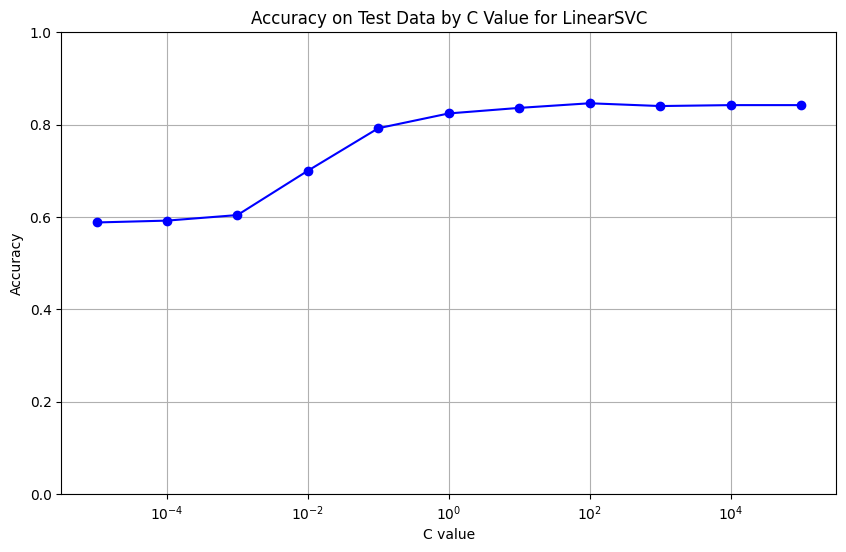

In [ ]:
from sklearn.svm import LinearSVC

# TODO: Train Linear kernel SVM for different values of C on train data
Cs = [10**(-5), 10**(-4), 10**(-3), 10**(-2), 10**(-1), 1, 10, 10**2, 10**3, 10**4, 10**5] # TODO: fill in the hyper-parameter candidates
accuracies = []
for c in Cs:
  lsvc = LinearSVC(random_state = 7, C = c, dual=False)
  # TODO: Fit the model and get prediction and evalutation on testing data.
  lsvc.fit(X_train_norm, y_train)
  # TODO: Save your results
  y_pred = lsvc.predict(X_test_norm)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
print(accuracies)
# TODO: Plot accuracy on test data
plt.figure(figsize=(10, 6))
plt.ylim([0.0, 1.0])
plt.semilogx(Cs, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('Accuracy on Test Data by C Value for LinearSVC')
plt.grid(True)
plt.show()

### 1.b

The RBF kernel is expressed as $exp(γ\|x-x' \|)$.

$\gamma$ defines how much influence a single training example has. The larger $\gamma$ is, the closer other examples must be to be affected.

[0.806, 0.246, 0.242, 0.242, 0.242, 0.242]


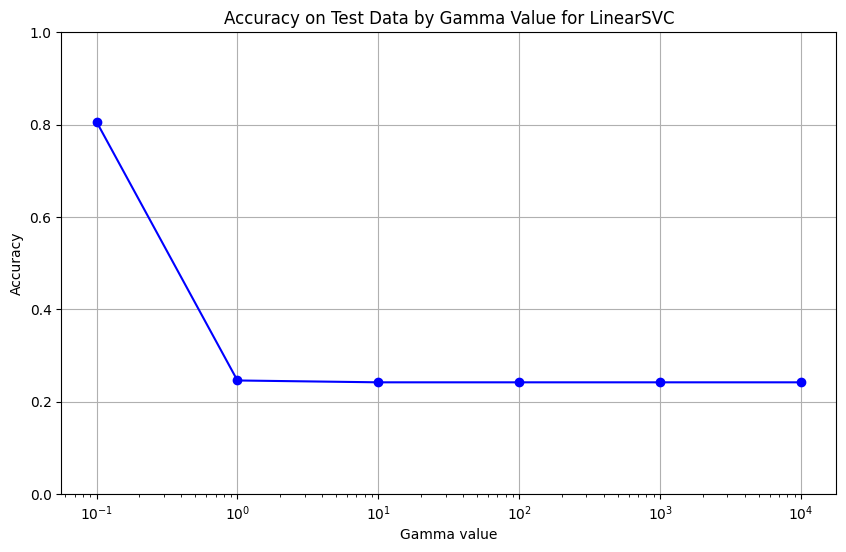

In [ ]:
from sklearn.svm import SVC

# TODO: Train RBF kernel SVM for different values of gamma on train data

gammas = [10**(-1), 1, 10, 10**2, 10**3, 10**4] # TODO: fill in the hyper-parameter candidates
accuracies = []
for g in gammas:
  rsvc = SVC(random_state = 7, C=1.0, kernel='rbf', gamma = g)
  # TODO: Fit the model and get prediction and evalutation on testing data.
  rsvc.fit(X_train_norm, y_train)
  # TODO: Save your results
  y_pred = rsvc.predict(X_test_norm)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
# TODO: Plot accuracy on test data
print(accuracies)
plt.figure(figsize=(10, 6))
plt.ylim([0.0, 1.0])
plt.semilogx(gammas, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Gamma value')
plt.ylabel('Accuracy')
plt.title('Accuracy on Test Data by Gamma Value for LinearSVC')
plt.grid(True)
plt.show()

### 1.c

[0.776, 0.858, 0.866, 0.87]


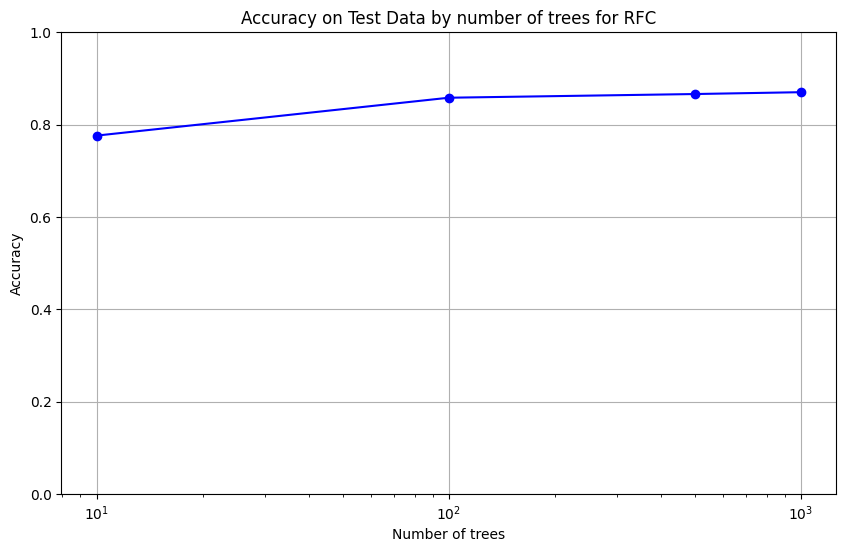

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_trees = [10, 100, 500, 1000] # TODO: fill in the hyper-parameter candidates
accuracies = []
# TODO: Train Random Forest for different values of number of estimators on train data
for n in n_trees:
  rf = RandomForestClassifier(random_state = 7, n_estimators=n)
  # TODO: Fit the model and get prediction and evalutation on testing data.
  rf.fit(X_train_norm, y_train)
  # TODO: Save your results
  y_pred = rf.predict(X_test_norm)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
# TODO: Plot accuracy on test data
print(accuracies)
plt.figure(figsize=(10, 6))
plt.ylim([0.0, 1.0])
plt.semilogx(n_trees, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy on Test Data by number of trees for RFC')
plt.grid(True)
plt.show()

### 1.d

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

n_folds = 5

# configure the cross-validation procedure
cv = KFold(n_splits=n_folds, shuffle=True, random_state=1)

# TODO: define search space for parts a, b, and C
space_a = dict()
space_b = dict()
space_c = dict()

space_a["C"] = Cs
space_b["gamma"] = gammas
space_c["n_estimators"] = n_trees
# TODO: define the model for parts a, b, and C
lsvc = LinearSVC(random_state = 7, dual=False)
rsvc = SVC(random_state = 7, C=1.0, kernel='rbf')
rf = RandomForestClassifier(random_state = 7)

# TODO: Perform a grid search and cross-validation to find the optimal hyperparameters of parts a, b, and c
lsvc_search = GridSearchCV(lsvc, space_a, scoring = 'accuracy', n_jobs = -1, cv = cv)
rsvc_search = GridSearchCV(rsvc, space_b, scoring = 'accuracy', n_jobs = -1, cv = cv)
rf_search = GridSearchCV(rf, space_c, scoring = 'accuracy', n_jobs = -1, cv = cv)

# TODO: For each part, report the optimal value
lsvc_fit = lsvc_search.fit(X_train_norm, y_train)
rsvc_fit = rsvc_search.fit(X_train_norm, y_train)
rf_fit = rf_search.fit(X_train_norm, y_train)
best_lsvc = lsvc_fit.best_estimator_.C
best_rsvc = rsvc_fit.best_estimator_.gamma
best_rf = rf_fit.best_estimator_.n_estimators;

print(f'Optimal lsvc : {best_lsvc}')
print(f'Optimal rsvc : {best_rsvc}')
print(f'Optimal rf : {best_rf}')
# TODO: For each part, report the accuracy on test data for the best estimator
y_pred_lsvc = lsvc_fit.predict(X_test_norm)
y_pred_rsvc = rsvc_fit.predict(X_test_norm)
y_pred_rf = rf_fit.predict(X_test_norm)
acc_lsvc = metrics.accuracy_score(y_pred_lsvc, y_test)
acc_rsvc = metrics.accuracy_score(y_pred_rsvc, y_test)
acc_rf = metrics.accuracy_score(y_pred_rf, y_test)

print(f'lsvc accuracy : {acc_lsvc}')
print(f'rsvc accuracy : {acc_rsvc}')
print(f'rf accuracy : {acc_rf}')

Optimal lsvc : 100
Optimal rsvc : 0.1
Optimal rf : 500
lsvc accuracy : 0.846
rsvc accuracy : 0.806
rf accuracy : 0.866


Hint: Here I provide an example code of how to use GridSearchCV. For more information, please refer to [Scikit Learn - GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)